In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv(r"Datasets\iris.csv")
df.sample(10)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
39,40,5.1,3.4,1.5,0.2,Setosa
45,46,4.8,3.0,1.4,0.3,Setosa
129,130,7.2,3.0,5.8,1.6,Virginica
31,32,5.4,3.4,1.5,0.4,Setosa
41,42,4.5,2.3,1.3,0.3,Setosa
76,77,6.8,2.8,4.8,1.4,Versicolor
130,131,7.4,2.8,6.1,1.9,Virginica
32,33,5.2,4.1,1.5,0.1,Setosa
103,104,6.3,2.9,5.6,1.8,Virginica
57,58,4.9,2.4,3.3,1.0,Versicolor


In [2]:
df['Species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [3]:
df.describe()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,148.000000,150.000000,150.000000,148.000000
mean,75.500000,5.856757,3.054000,3.758667,1.197973
std,43.445368,0.825459,0.433594,1.764420,0.760278
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isnull().sum()

Id             0
SepalLength    2
SepalWidth     0
PetalLength    0
PetalWidth     2
Species        0
dtype: int64

In [5]:
df['SepalLength'].fillna(method='ffill', inplace=True)

In [6]:
df['PetalWidth'].fillna(method='ffill', inplace=True)

In [7]:
df.isnull().sum()

Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [8]:
df.replace(to_replace="Setosa", value=0, inplace=True)
df.replace(to_replace="Virginica", value=1, inplace=True)
df.replace(to_replace="Versicolor", value=2, inplace=True)
df.sample(10)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
35,36,5.0,3.2,1.2,0.2,0
121,122,5.6,2.8,4.9,2.0,1
27,28,5.2,3.5,1.5,0.2,0
34,35,5.5,3.1,1.5,0.1,0
147,148,6.5,3.0,5.2,2.0,1
143,144,6.8,3.2,5.9,2.3,1
134,135,6.1,2.6,5.6,1.4,1
93,94,5.0,2.3,3.3,1.0,2
71,72,6.1,2.8,4.0,1.3,2
116,117,6.5,3.0,5.5,1.8,1


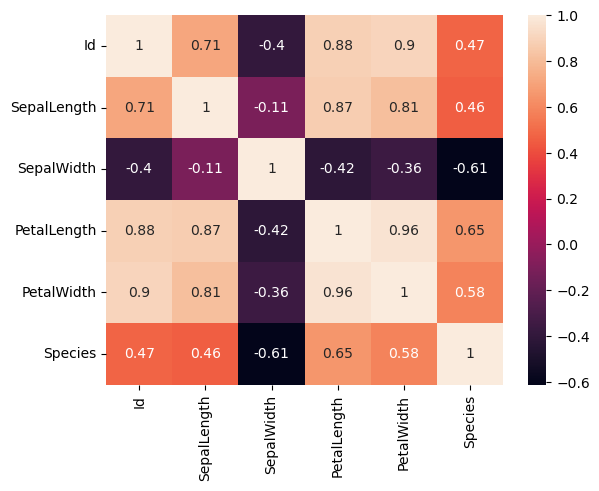

In [16]:
sns.heatmap(df.corr(),annot=True) 
plt.show()

In [9]:
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = df['Species']

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [11]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model = model.fit(X_train,y_train) 
y_pred = model.predict(X_test) 


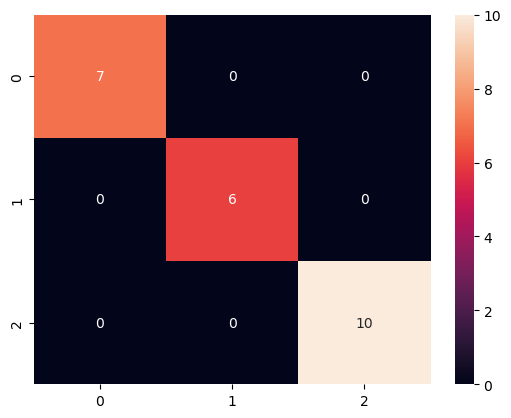

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True) 
plt.show() 

In [13]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        10

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [15]:
sr = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('R2 Score:',sr)
print('Mean Square Error:',mae)

R2 Score: 1.0
Mean Square Error: 0.0
